<a href="https://colab.research.google.com/github/rattapornsupama/DPDM65/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preparation

In [2]:
from google.colab import drive #เชื่อมต่อ google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [8]:
abalone_df=pd.read_csv('/content/drive/MyDrive/DPDM65/abalone.data',header=None) 
#ข้อมูลไม่มีหัวข้อ (ไม่มีแถบบนสุด)
#ใส่ header=None 

In [9]:
abalone_df

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [61]:
col_names = ['Sex', 'Length',	'Diam',	'Height',	'Whole',	'Shucked',	'Viscera',	'Shell', 'Class_Age']
abalone_df=pd.read_csv('/content/drive/MyDrive/DPDM65/abalone.data',header=None,names=col_names)  #ใส่หัวข้อให้ โดยที่กำหนดชื่อ
abalone_df

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Class_Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [62]:
from matplotlib import pyplot as plt

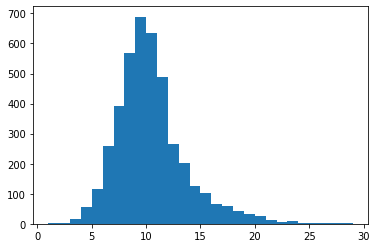

In [63]:
plt.hist(abalone_df['Class_Age'],bins=len(set(abalone_df['Class_Age'])));

In [64]:
abalone_df['CLASS']=abalone_df['Class_Age']>=10   #สร้างคอลัมน์ใหม่ ที่ ถ้าค่าในคอลัมน์ Class_Age >=10 ให้เป็น True
abalone_df

,Sex,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Class_Age,CLASS
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,True
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,False
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,False
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,True
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,True
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,True
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,False
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,True


one-hot-encoder(dummy)

In [66]:
abalone_df_dp = pd.get_dummies(abalone_df,columns=['Sex']) #สร้าง data ใหม่ ที่แปลง sex เป็น ตัวเลข
abalone_df_dp

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Class_Age,CLASS,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,True,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,False,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,False,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,True,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,True,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,True,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,False,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,True,1,0,0


#เริ่มทำ Data Mining

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [48]:
import numpy as np
from sklearn.model_selection import train_test_split

In [67]:
TRAIN = abalone_df_dp.iloc[:3133,:]  #data ตัวที่ 0 ถึง 3133 , เอามาทุกคอลัมน์
TEST = abalone_df_dp.iloc[3133:,:]
print(f'train={TRAIN.shape[0]},test = {TEST.shape[0]}')

train=3133,test = 1044


In [69]:
X_train = TRAIN.drop(columns=['Class_Age','CLASS'])  #ลบคอลัมน์ Class_Age กับ CLASS
X_train

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3128,0.630,0.495,0.190,1.1655,0.5360,0.2115,0.1625,1,0,0
3129,0.630,0.490,0.170,1.2155,0.4625,0.2045,0.3105,1,0,0
3130,0.670,0.515,0.165,1.1735,0.5260,0.2850,0.3160,0,0,1
3131,0.675,0.505,0.160,1.5320,0.7400,0.3570,0.3815,0,0,1


In [70]:
Y_train = TRAIN.iloc[:,8]  #ให้ y_train เป็นคอลัมน์ที่ 8
Y_train

0        True
1       False
2       False
3        True
4       False
        ...  
3128     True
3129     True
3130     True
3131     True
3132     True
Name: CLASS, Length: 3133, dtype: bool

In [72]:
X_test = TEST.drop(columns=['Class_Age','CLASS'])   #ทำเหมือน X_train,Y_train แต่เปลี่ยน train เป็น test
Y_test = TEST.iloc[:,8]

#Decision Tree


ประกอบด้วย

1.   import
2.   define
3.   build model

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier





#import

https://scikit-learn.org/stable/modules/tree.html

In [53]:
from sklearn.tree import DecisionTreeClassifier

#define

In [54]:
Dtree1 = DecisionTreeClassifier(random_state=0)

#buid model (fit)

In [73]:
Dtree1.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

exploring the tree

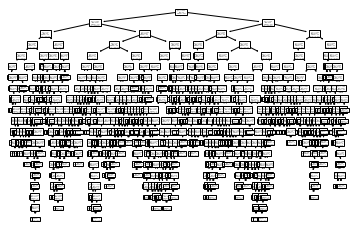

In [74]:
from sklearn import tree
tree.plot_tree(Dtree1);

#Test

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [75]:
Dtree1.predict(X_test)

array([ True,  True,  True, ...,  True, False,  True])

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Dtree1.predict(X_test))

0.7097701149425287

## ลองสร้างต้นไม้แบบคนมีความรู้

ป้องกัน Overfitting

0.7710727969348659

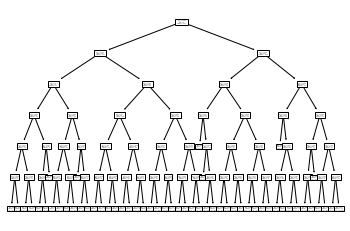

In [81]:
#สร้างต้นไม้สูงไม่เกิน 6 ชั้น 
#import
from sklearn.tree import DecisionTreeClassifier
#define
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth=6)   #max_depth คือ ความสูงของต้นไม้
#buid model (fit)
Dtree2.fit(X_train,Y_train)

#explore
from sklearn import tree
tree.plot_tree(Dtree2);

#test
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Dtree2.predict(X_test))

##Hw 3 หาต้นไม้ที่แม่นกว่านี้

0.7174329501915708

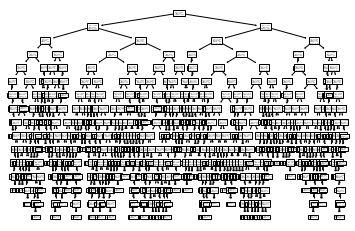

In [82]:
#สร้างต้นไม้สูงไม่เกิน 6 ชั้น 
#import
from sklearn.tree import DecisionTreeClassifier
#define
Dtree3 = DecisionTreeClassifier(random_state=0,max_depth=15)   #max_depth คือ ความสูงของต้นไม้
#buid model (fit)
Dtree3.fit(X_train,Y_train)

#explore
from sklearn import tree
tree.plot_tree(Dtree3);

#test
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Dtree3.predict(X_test))